In [50]:
import boto3
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Getting the Data

Getting the data from the S3 Bucket `s3::mobilefacenet-vggface2-database`. First exploring the dataset only with the `test` data (because of its size).

In [23]:
bucket = 'mobilefacenet-vggface2-database'
test_file = 'vggface2_test.tar.gz'

In [24]:
s3 = boto3.Session().resource('s3')

In [25]:
s3_object = s3.Object(bucket, test_file)

In [26]:
type(s3_object)

boto3.resources.factory.s3.Object

In [33]:
os.makedirs('/data', exist_ok=True)

s3_object.download_file('/data/' + test_file)

## Exploring the Dataset

Exploring the images on the text dataset

In [48]:
image_files = glob.glob('/root/data/test/*/*.jpg')

In [49]:
print(f'There are {len(image_files)} image files')

There are 169396 image files


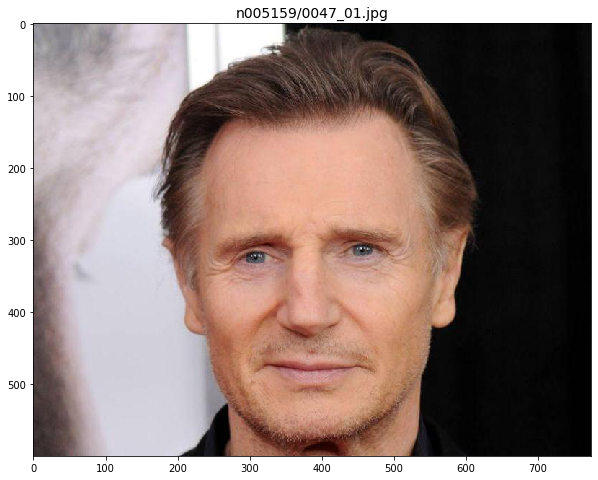

In [60]:
random_image_ix = np.random.randint(0, len(image_files))

random_image_path = image_files[random_image_ix]

random_image = plt.imread(random_image_path)
plt.figure(figsize=(10.0, 8.0))
_ = plt.imshow(random_image)
_ = plt.title('/'.join(random_image_path.split('/')[-2:]), fontsize=14)

# Send to S3 Bucket

Moving the entire `test` folder to the S3 bucket using **AWS CLI** `sync` function.

In [62]:
!aws s3 sync /root/data/test s3://mobilefacenet-vggface2-database/test

2020-06-20 14:14:40 mobilefacenet-vggface2-database
2020-06-20 13:52:19 sagemaker-studio-528941824921-7y4yf5frwx9
2020-06-20 17:07:11 sagemaker-studio-528941824921-zfuvv0eevx


Deleting the `.tar.gz` dataset file

In [63]:
!aws s3 rm s3://mobilefacenet-vggface2-database/vggface2_test.tar.gz

delete: s3://mobilefacenet-vggface2-database/vggface2_test.tar.gz
